## Data Processing


### Step 1: Import packages

In [60]:
import copy
import matplotlib.pyplot as plt 
import numpy as np
import os 
import random

from PIL import Image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

### Step 2: Define working directories

In [79]:
test_data_dir = 'data/test'
train_data_dir = 'data/train'
validation_data_dir = 'data/val'

### Step 3: Define global variables

In [93]:
test_data = []
test_labels = []

train_data = []
train_labels = []
mini_train_data = []
mini_train_labels = []

val_data = []
val_labels = []

### Step 4: Load Data

In [87]:
def load_dir(dir_name, file_list, data, labels):
    for file_name in file_list:
        label = os.path.basename(dir_name)
        file_path = os.path.join(dir_name, file_name)
        
        #Ignore files that start with . like .DS_Store generated on Mac.
        if file_name.startswith('.'):
            continue
        
        image = copy.deepcopy(Image.open(file_path))
        
        data.append(image) 
        labels.append(label)

#### Step 4a: Load test data

In [94]:
for dir_name, sub_dir_list, file_list in os.walk(test_data_dir): 
    if dir_name in [test_data_dir, 'data/test/COVID19', 'data/test/TURBERCULOSIS']:
        continue
    load_dir(dir_name, file_list, test_data, test_labels) 

#### Step 4b: Define & Load Mini-Train Data Set

In [42]:
#DON'T NEED TO RE-RUN
#pull 500 random indexes from the 1341 NORMAL xray files
random.seed(12)
train_norm_ind = random.sample(range(0, 1340), 500)

#pull 500 random indexes from the 3875 pneunomia xray files
random.seed(25)
train_pn_ind = random.sample(range(0, 3874), 500)

In [47]:
#DON'T NEED TO RE-RUN
with open('normal_train_ind.txt', 'w') as n_file:
    n_file.writelines("%s," % ind for ind in train_norm_ind)
with open('pn_train_ind.txt', 'w') as pn_file:
    pn_file.writelines("%s," % ind for ind in train_pn_ind)

In [54]:
train_norm = open("normal_train_ind.txt", "r")
norm_ind = train_norm.read()
norm_list = norm_ind.split(",")
norm_list.pop()
norm_list = [int(x) for x in norm_list]

train_pn = open("pn_train_ind.txt", "r")
pn_ind = train_pn.read()
pn_list = pn_ind.split(",")
pn_list.pop()
pn_list = [int(x) for x in pn_list]

train_norm.close()
train_pn.close()

In [95]:
for dir_name, sub_dir_list, file_list in os.walk(train_data_dir): 
    if dir_name in [train_data_dir, 'data/train/COVID19', 'data/train/TURBERCULOSIS']:
        continue
        
    if dir_name == 'data/train/NORMAL':
        for i in range(len(file_list)):
            if i in norm_list:
                label = os.path.basename(dir_name)
                file_path = os.path.join(dir_name, file_list[i])
        
                image = copy.deepcopy(Image.open(file_path))
        
                mini_train_data.append(image) 
                mini_train_labels.append(label)
                
    if dir_name == 'data/train/PNEUMONIA':
        for j in range(len(file_list)):
            if j in pn_list:
                label = os.path.basename(dir_name)
                file_path = os.path.join(dir_name, file_list[j])
        
                image = copy.deepcopy(Image.open(file_path))
        
                mini_train_data.append(image) 
                mini_train_labels.append(label)

#### Step 4c: Load validation data

In [96]:
for dir_name, sub_dir_list, file_list in os.walk(validation_data_dir):
    if dir_name in [validation_data_dir, 'data/val/COVID19', 'data/val/TURBERCULOSIS']: 
        continue     
    load_dir(dir_name, file_list, val_data, val_labels) 

### Step 5: Process Data

In [65]:
def process_data(data): 
    #normalize to 1-channel palette with up to 256 different colors 
    conv_data = [i.convert('P') for i in data]
    
    #re-scale to 200x200
    rescaled_data = []
    for i in conv_data:
        rescaled_data.append(resize(np.array(i), (200,200), anti_aliasing = False).flatten())
   
    return rescaled_data

#### Step 5a: Process Mini-Train Data

In [66]:
mini_train_data = process_data(mini_train_data)

Text(0.5, 1.0, 'PNEUMONIA')

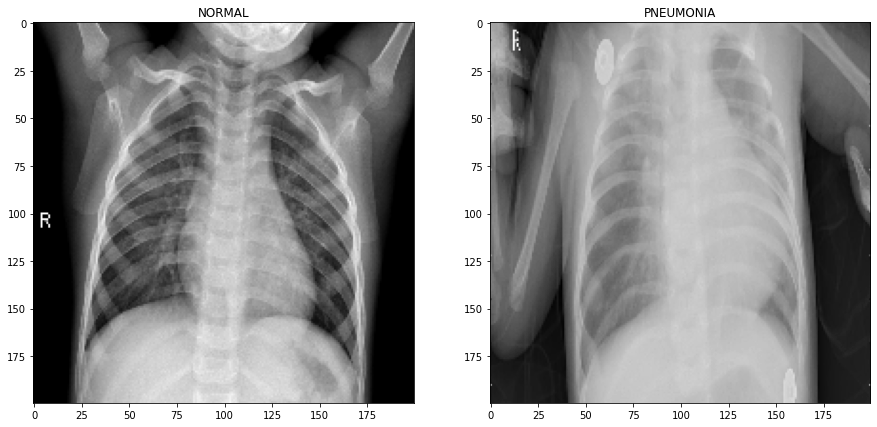

In [72]:
fig,ax= plt.subplots(1,2,figsize = (15,15))

normal = mini_train_labels.index('NORMAL') 
ax[0].imshow(mini_train_data[normal].reshape(200,200), cmap = 'gray')
ax[0].set_title('NORMAL')

pneumonia = mini_train_labels.index('PNEUMONIA')
ax[1].imshow(mini_train_data[pneumonia].reshape(200,200), cmap = 'gray')
ax[1].set_title('PNEUMONIA')